# 4. Evaluation

In [1]:
from fgraphs import evaluation
from fgraphs.classification import load_preprocess

2024-06-19 18:01:05.438579: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-19 18:01:05.708298: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-19 18:01:06.818774: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-19 18:01:08.880733: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 4.1. Dataset loading

In [2]:
sets = load_preprocess(preprocess_file="../datasets/LID_fg_dataset.pkl")

In [3]:
labels = {
    0: 'linear',
    1: 'quadrática',
    2: 'cúbica',
    3: 'exponencial',
    4: 'logarítmica',
    5: 'raíz quadrada',
    6: 'seno',
    7: 'cosseno',
    8: 'tangente',
    9: 'cotangente'
}

## 4.2. Predictions

In [4]:
y_pred = evaluation.predict(
    model_path="../models/cnn_model.keras",
    x=sets["x"]["test"]
)
y_pred

46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step


array([[2.00305519e-11, 1.09257915e-11, 1.50586071e-11, ...,
        2.25622499e-13, 1.52870643e-25, 2.55171882e-12],
       [5.07513920e-10, 6.44035547e-10, 5.07060394e-09, ...,
        3.68113848e-16, 2.81363901e-27, 5.69760628e-10],
       [1.76039627e-10, 1.86051459e-08, 2.12918197e-10, ...,
        1.94195686e-15, 9.99999940e-01, 2.32500740e-15],
       ...,
       [2.61794389e-06, 1.07004894e-06, 5.97430924e-11, ...,
        3.86288613e-01, 1.38793979e-07, 1.89431262e-10],
       [5.07013453e-07, 1.14673702e-08, 1.61381353e-10, ...,
        6.17675399e-15, 3.00523712e-12, 1.61031195e-13],
       [9.66811768e-08, 3.65595496e-03, 2.99914760e-08, ...,
        2.38026043e-10, 1.53517218e-16, 1.39719736e-10]], dtype=float32)

## 4.3. Compare predictions

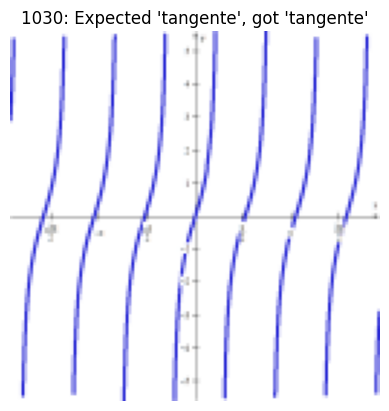

In [5]:
evaluation.compare_predictions(
    x=sets["x"]["test"],
    y=sets["y"]["test"],
    y_pred=y_pred,
    labels=labels,
    n=None
)

## 4.4. Confusion matrix

In [6]:
cm = evaluation.compute_confusion_matrix(
    y_true=sets["y"]["test"],
    y_pred=y_pred
)

cm

array([[137,   1,   0,   1,   2,   2,   2,   0,   0,   0],
       [  1, 143,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   1, 143,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   1, 143,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0, 145,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 145,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 144,   1,   0,   0],
       [  0,   2,   0,   0,   0,   0,   8, 135,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 143,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 145]])

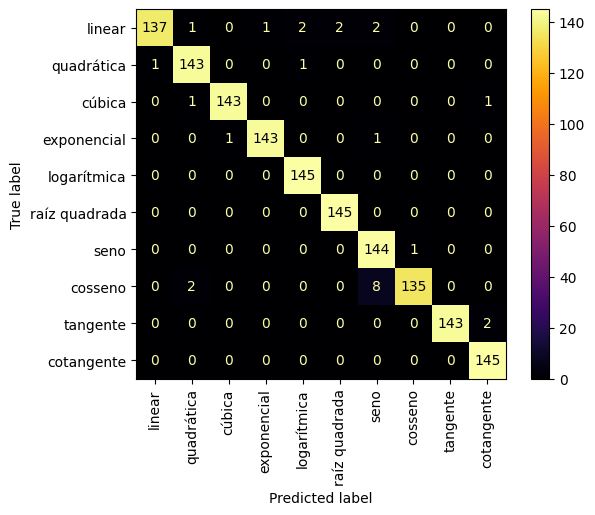

In [7]:
evaluation.display_cm(
    cm=cm,
    labels=list(labels.values())
)

In [8]:
cm = evaluation.frame_cm(cm)
cm

,0,1,2,3,4,5,6,7,8,9
0,137,1,0,1,2,2,2,0,0,0
1,1,143,0,0,1,0,0,0,0,0
2,0,1,143,0,0,0,0,0,0,1
3,0,0,1,143,0,0,1,0,0,0
4,0,0,0,0,145,0,0,0,0,0
5,0,0,0,0,0,145,0,0,0,0
6,0,0,0,0,0,0,144,1,0,0
7,0,2,0,0,0,0,8,135,0,0
8,0,0,0,0,0,0,0,0,143,2
9,0,0,0,0,0,0,0,0,0,145


## Report

In [27]:
binary_cms = evaluation.process_binary_confusion_matrices(cm, list(labels.keys()))
binary_cms[1]

,PREDICTED POSITIVE,PREDICTED NEGATIVE
ACTUAL POSITIVE,143,2
ACTUAL NEGATIVE,4,1301


In [25]:
df_report = evaluation.report(binary_cms, list(labels.keys()))
df_report.to_csv("report.csv", index=False)
df_report

,label,P,N,TP,FN,FP,TN,TPR,TNR,PPV,...,TS,PRE,ACC,BA,F1,MCC,FM,BM,MK,DOR
0,0,145,1305,137,8,1,1304,0.944828,0.999234,0.992754,...,0.938356,0.1,0.993793,0.972031,0.968198,0.965124,0.968494,0.944061,0.986656,22331.000000
1,1,145,1305,143,2,4,1301,0.986207,0.996935,0.972789,...,0.959732,0.1,0.995862,0.991571,0.979452,0.977180,0.979475,0.983142,0.971254,23255.375000
2,2,145,1305,143,2,1,1304,0.986207,0.999234,0.993056,...,0.979452,0.1,0.997931,0.992720,0.989619,0.988478,0.989625,0.985441,0.991524,93236.000000
3,3,145,1305,143,2,1,1304,0.986207,0.999234,0.993056,...,0.979452,0.1,0.997931,0.992720,0.989619,0.988478,0.989625,0.985441,0.991524,93236.000000
4,4,145,1305,145,0,3,1302,1.000000,0.997701,0.979730,...,0.979730,0.1,0.997931,0.998851,0.989761,0.988675,0.989813,0.997701,0.979730,NaN
5,5,145,1305,145,0,2,1303,1.000000,0.998467,0.986395,...,0.986395,0.1,0.998621,0.999234,0.993151,0.992413,0.993174,0.998467,0.986395,NaN
6,6,145,1305,144,1,11,1294,0.993103,0.991571,0.929032,...,0.923077,0.1,0.991724,0.992337,0.960000,0.956051,0.960534,0.984674,0.928260,16939.636364
7,7,145,1305,135,10,1,1304,0.931034,0.999234,0.992647,...,0.924658,0.1,0.992414,0.965134,0.960854,0.957261,0.961347,0.930268,0.985037,17604.000000
8,8,145,1305,143,2,0,1305,0.986207,1.000000,1.000000,...,0.986207,0.1,0.998621,0.993103,0.993056,0.992319,0.993080,0.986207,0.998470,NaN
9,9,145,1305,145,0,3,1302,1.000000,0.997701,0.979730,...,0.979730,0.1,0.997931,0.998851,0.989761,0.988675,0.989813,0.997701,0.979730,NaN


## 4.5. Analyze errors

In [11]:
df_errors = evaluation.frame_errors(
    y_true=sets["y"]["test"],
    y_pred=y_pred,
    labels=labels
)

df_errors

,y_true,y_pred,y_true_label,y_pred_label,hits
1172,0,1,linear,quadrática,False
183,0,3,linear,exponencial,False
546,0,4,linear,logarítmica,False
747,0,4,linear,logarítmica,False
896,0,5,linear,raíz quadrada,False
917,0,5,linear,raíz quadrada,False
160,0,6,linear,seno,False
258,0,6,linear,seno,False
24,1,0,quadrática,linear,False
539,1,4,quadrática,logarítmica,False


## 4.6. Predict new images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


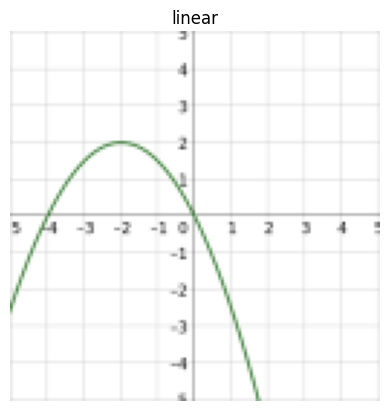

In [12]:
evaluation.predict_image(
    image_path="../examples/quadratic.png",
    model_path="../models/cnn_model.keras",
    labels=labels
)

## 4.7. Chord diagram

/home/hellsdeur/.cache/pypoetry/virtualenvs/fgraphs-aLnKkHDs-py3.9/lib/python3.9/site-packages/mpl_chord_diagram/utilities.py:167: RuntimeWarning: invalid value encountered in divide
  return (mat[i, :] / x[i]) * (end - start)


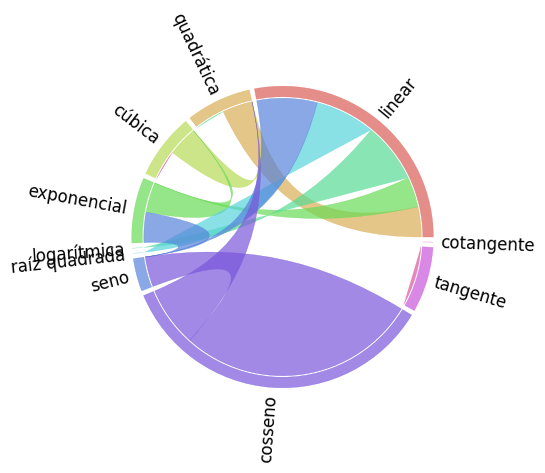

[(0.6697134817282413, 0.8086926810546987, -39.62962962962963),
 (-0.4492779531887368, 0.9490254584459467, 25.33333333333333),
 (-0.8332275589003114, 0.6389302270898038, 52.51851851851853),
 (-1.0330914236782296, 0.18767554535018305, 79.7037037037037),
 (-1.0470494771135543, -0.0786599801438603, -85.7037037037037),
 (-1.0436664491447774, -0.11515356238315858, -83.7037037037037),
 (-1.0161288383829088, -0.2645414595230782, -75.40740740740739),
 (-0.07595239268508866, -1.0472493657412307, -4.148148148148152),
 (1.0062774763551479, -0.29984269305806865, 73.40740740740739),
 (1.0493603683700505, -0.036644471537627725, 87.99999999999994)]

In [13]:
evaluation.show_chord(cm, list(labels.values()))